# Plots about DkNN for member & non-members and their generated neighbors

Each experiment was structered in the following way:
1. Similar points/neighbors were generated for all member and non-member points.
2. For each member and non-member, the DkNN was trained on the generated neighbors.
3. For each member and non-member, the point that the generated neighbors were created on was fed into the DkNN.

Amount of analysed member/ non-member per experiment: 1000 

Parameters of experiments:
1. K_NEIGHBORS = [5, 10, 50, 100] for DkNN
2. AMOUNT_GENERATE_NEIGHBORS = [50, 100, 200] for generate_neighboring_points
3. SCALES = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2]

In [42]:
import os
print (os.environ['CONDA_DEFAULT_ENV'])

mia2


In [43]:
import sys
sys.path.append('/home/inafen/jupyter_notebooks/utils/')

In [44]:
import pickle
from utils import *
from utils_plot import plot_member_non_member_layer_experiments_scatter, plot_mean_layer_experiments_all, plot_member_non_member_experiments_histogram


In [45]:
#open pickle
with open('/home/inafen/jupyter_notebooks/data_neighbors_test5.pickle', 'rb') as f:
    loaded_obj = pickle.load(f)
print("Pickle is loaded")


Pickle is loaded


In [46]:
#get data from pickle
train_accuracy = []
test_accuracy = []
knns_ind_member = []
knns_ind_non_member = []
knns_distances_member =[]
knns_distances_non_member = []
scale = []
k_neighbors = []
amount_generate_neighbors = []
experiment_setups = []
knns_ind_member_points = []
knns_ind_non_member_points = []
knns_distances_member_points = []
knns_distances_non_member_points = []

amount_m_nm_total = loaded_obj[0][0][10]
for experiment in range(len(loaded_obj)):
    for point in range(amount_m_nm_total):
        knns_ind_member_current = []
        knns_ind_non_member_current = []
        knns_distances_member_current = []
        knns_distances_non_member_current = []
        #append values for current point
        knns_ind_member_current.append(loaded_obj[experiment][point][2]) #original member data point always as first point
        knns_ind_non_member_current.append(loaded_obj[experiment][point][3])
        knns_distances_member_current.append(loaded_obj[experiment][point][4])
        knns_distances_non_member_current.append(loaded_obj[experiment][point][5])
        #append current point values to list of all points in this experiment
        knns_ind_member_points.append(knns_ind_member_current)
        knns_ind_non_member_points.append(knns_ind_non_member_current)
        knns_distances_member_points.append(knns_distances_member_current)
        knns_distances_non_member_points.append(knns_distances_non_member_current)

    #append all points of experiment to list of all experiments
    knns_ind_member.append(knns_ind_member_points)
    knns_ind_non_member.append(knns_ind_non_member_points)
    knns_distances_member.append(knns_distances_member_points)
    knns_distances_non_member.append(knns_distances_non_member_points)
    knns_ind_member_points = []
    knns_ind_non_member_points = []
    knns_distances_member_points = []
    knns_distances_non_member_points = []

    train_accuracy.append(loaded_obj[experiment][point][0][1])
    test_accuracy.append(loaded_obj[experiment][point][1][1])
    scale.append(loaded_obj[experiment][point][6])
    k_neighbors.append(loaded_obj[experiment][point][7])
    amount_generate_neighbors.append(loaded_obj[experiment][point][8])

for i in range(len(loaded_obj[0][0][9])):
    experiment_setups.append("Experiment {}: {}".format(i,(loaded_obj[0][0][9][i])))

mean_knns_layers_member_all_experiments = []
mean_knns_layers_non_member_all_experiments = []
mean_distances_knns_layers_member_all_experiments = []
mean_distances_knns_layers_non_member_all_experiments = []
sum_similarities_knns_layers_member_all_experiments = []
sum_similarities_knns_layers_non_member_all_experiments = []
print("Got data from pickle.")
print("The experiment setups are: {}".format(experiment_setups))

Got data from pickle.
The experiment setups are: ['Experiment 0: (0.005, 5, 50)', 'Experiment 1: (0.005, 5, 100)', 'Experiment 2: (0.005, 5, 200)', 'Experiment 3: (0.005, 10, 50)', 'Experiment 4: (0.005, 10, 100)', 'Experiment 5: (0.005, 10, 200)', 'Experiment 6: (0.005, 50, 50)', 'Experiment 7: (0.005, 50, 100)', 'Experiment 8: (0.005, 50, 200)', 'Experiment 9: (0.005, 100, 50)', 'Experiment 10: (0.005, 100, 100)', 'Experiment 11: (0.005, 100, 200)', 'Experiment 12: (0.01, 5, 50)', 'Experiment 13: (0.01, 5, 100)', 'Experiment 14: (0.01, 5, 200)', 'Experiment 15: (0.01, 10, 50)', 'Experiment 16: (0.01, 10, 100)', 'Experiment 17: (0.01, 10, 200)', 'Experiment 18: (0.01, 50, 50)', 'Experiment 19: (0.01, 50, 100)', 'Experiment 20: (0.01, 50, 200)', 'Experiment 21: (0.01, 100, 50)', 'Experiment 22: (0.01, 100, 100)', 'Experiment 23: (0.01, 100, 200)', 'Experiment 24: (0.02, 5, 50)', 'Experiment 25: (0.02, 5, 100)', 'Experiment 26: (0.02, 5, 200)', 'Experiment 27: (0.02, 10, 50)', 'Experime

In [47]:
#prepare data for plots
for experiment in range(len(experiment_setups)): #for all experiments
    for point in range(amount_m_nm_total):
        knns_indices_list_member = []
        knns_indices_list_non_member = []
        #make dicts to lists for get_differences_knns_btw_layers and to compare distances
        knns_indices_list_member = list(knns_ind_member[experiment][point][0].items())
        knns_indices_list_non_member = list(knns_ind_non_member[experiment][point][0].items())
        #get for point: for layer: distance to k nns
        knns_distances_list_member = list(knns_distances_member[experiment][point][0].items())
        knns_distances_list_non_member = list(knns_distances_non_member[experiment][point][0].items())
        #outputs amount of changes in nn for one data point btw two layers (e.g. 'layer 1': [1])
        _, _, differences_knns_total_member = get_differences_knns_btw_layers(1, knns_indices_list_member, num_instead_of_data=True, compares_with_first_layer_only= False) #1 because in each fprop of DkNN 1 input point != amount_m_nm_total (for how many this is repeated)
        _, _, differences_knns_total_non_member = get_differences_knns_btw_layers(1, knns_indices_list_non_member, num_instead_of_data=True, compares_with_first_layer_only= False) #1 because in each fprop of DkNN 1 input point != amount_m_nm_total (for how many this is repeated)
        _, _, similarities_knns_total_member = get_similarities_knns_btw_layers(1, knns_indices_list_member, num_instead_of_data=True, compares_with_first_layer_only=True)
        _, _, similarities_knns_total_non_member = get_similarities_knns_btw_layers(1, knns_indices_list_non_member, num_instead_of_data=True, compares_with_first_layer_only=True)

        distances_knns_all_member = get_distances_of_knns(1, knns_distances_list_member, num_instead_of_data=True)
        distances_knns_all_non_member = get_distances_of_knns(1, knns_distances_list_non_member, num_instead_of_data=True)

        #put amount of changes (differences_knns_total_member)/ distances knns for all points of one experiments in one dict
        if point == 0:
            differences_knns_total_member_points_experiment = differences_knns_total_member
            differences_knns_total_non_member_points_experiment = differences_knns_total_non_member

            similarities_knns_total_member_points_experiment = similarities_knns_total_member
            similarities_knns_total_non_member_points_experiment = similarities_knns_total_non_member

            distances_knns_total_member_points_experiment = distances_knns_all_member
            distances_knns_total_non_member_points_experiment = distances_knns_all_non_member

        else:
            #changes are always between two layers so range starts at 1 (means changes btw. layer 0 and 1)
            for layer in range(1, len(knns_indices_list_member)):
                differences_knns_total_member_points_experiment["layer {}".format(layer)].append(differences_knns_total_member["layer {}".format(layer)][0])
                differences_knns_total_non_member_points_experiment["layer {}".format(layer)].append(differences_knns_total_non_member["layer {}".format(layer)][0])

                similarities_knns_total_member_points_experiment["layer {}".format(layer)].append(similarities_knns_total_member["layer {}".format(layer)][0])
                similarities_knns_total_non_member_points_experiment["layer {}".format(layer)].append(similarities_knns_total_non_member["layer {}".format(layer)][0])
            #distances of knn are measured for each layer so range starts at 0
            for layer in range(0, len(knns_indices_list_member)):
                distances_knns_total_member_points_experiment["layer {}".format(layer)].append(distances_knns_all_member["layer {}".format(layer)][0])
                distances_knns_total_non_member_points_experiment["layer {}".format(layer)].append(distances_knns_all_non_member["layer {}".format(layer)][0])
    #outputs mean of changes in nn/ distances for one experiment
    mean_knns_layers_member_one_experiment = get_mean_knns_layer(knns_indices_list_member, differences_knns_total_member_points_experiment)
    mean_knns_layers_non_member_one_experiment = get_mean_knns_layer(knns_indices_list_non_member, differences_knns_total_non_member_points_experiment)

    mean_distances_knns_layers_member_one_experiment = get_mean_distances_of_knns(distances_knns_total_member_points_experiment, knns_distances_list_member)
    mean_distances_knns_layers_non_member_one_experiment = get_mean_distances_of_knns(distances_knns_total_non_member_points_experiment, knns_distances_list_non_member)

    #get sum of similarities for one experiment for all points (e.g. [1,1,2,1] + [1,1,0,1] --> [2,2,2,2])
    sum_similarities_knns_layers_member_one_experiment = get_sum_similarities_of_knns(similarities_knns_total_member_points_experiment, knns_indices_list_member)
    sum_similarities_knns_layers_non_member_one_experiment = get_sum_similarities_of_knns(similarities_knns_total_non_member_points_experiment, knns_indices_list_non_member)

    #append means for one experiment to all experiments
    mean_knns_layers_member_all_experiments.append(mean_knns_layers_member_one_experiment)
    mean_knns_layers_non_member_all_experiments.append(mean_knns_layers_non_member_one_experiment)
    #get for all experiments per experiment the mean distance per layer (5 in total)
    mean_distances_knns_layers_member_all_experiments.append(mean_distances_knns_layers_member_one_experiment)
    mean_distances_knns_layers_non_member_all_experiments.append(mean_distances_knns_layers_non_member_one_experiment)
    #get for all experiments the sum of similarities in one list (e.g. [[2,2,2,2][1,2,3,4]]
    sum_similarities_knns_layers_member_all_experiments.append(sum_similarities_knns_layers_member_one_experiment)
    sum_similarities_knns_layers_non_member_all_experiments.append(sum_similarities_knns_layers_non_member_one_experiment)

#get the total sum for all layers for one experiment (e.g. [2,2,2,2] --> [8])
sum_similarities_knns_member_all_experiment = []
sum_similarities_knns_non_member_all_experiment = []
for experiment in range(len(sum_similarities_knns_layers_member_all_experiments)):
    sum_experiment_member = np.sum(sum_similarities_knns_layers_member_all_experiments[experiment])
    sum_experiment_non_member =np.sum(sum_similarities_knns_layers_non_member_all_experiments[experiment])
    sum_similarities_knns_member_all_experiment.append(sum_experiment_member)
    sum_similarities_knns_non_member_all_experiment.append(sum_experiment_non_member)
print("Data is ready to be plotted.")

/home/inafen/.conda/envs/mia2/lib/python3.9/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


Data is ready to be plotted.


Plot mean of knns changes between two layers.
In other words: 

1. Compare the knns of two consecutive layers --> save changes in knns (e.g. layer 0 [1,2], layer 1 [2,3] --> one change) --> repeat for all layers, all points

2. Compute mean of changes btw. two consecutive layers for all member/ non-member points for one experiment.


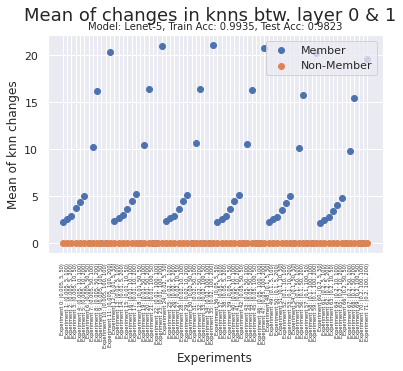

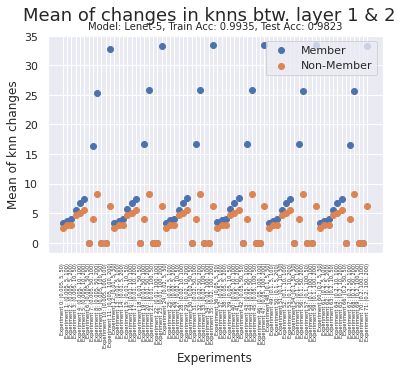

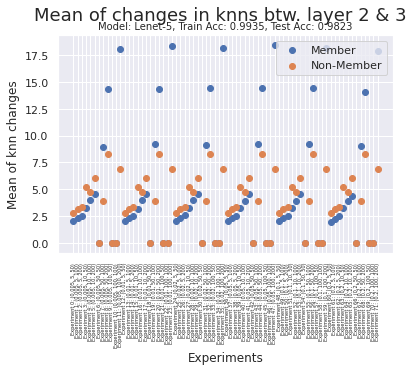

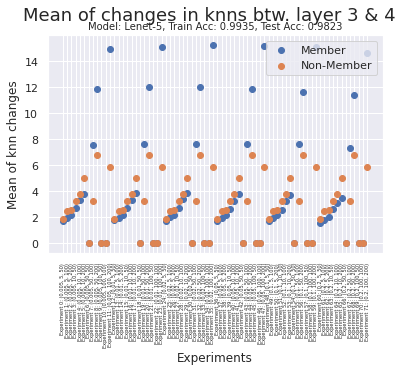

<Figure size 432x288 with 0 Axes>

In [48]:
print("Plot mean of knns changes between two layers.")
print("In other words: \n")
print("1. Compare the knns of two consecutive layers --> save changes in knns (e.g. layer 0 [1,2], layer 1 [2,3] --> one change) --> repeat for all layers, all points\n")
print("2. Compute mean of changes btw. two consecutive layers for all member/ non-member points for one experiment.")
plot_member_non_member_layer_experiments_scatter(mean_knns_layers_member_all_experiments, mean_knns_layers_non_member_all_experiments, experiment_setups, 0, "/home/inafen/jupyter_notebooks/changes_knns_0.png", train_accuracy, test_accuracy)
plot_member_non_member_layer_experiments_scatter(mean_knns_layers_member_all_experiments, mean_knns_layers_non_member_all_experiments, experiment_setups, 1, "/home/inafen/jupyter_notebooks/changes_knns_1.png", train_accuracy, test_accuracy)
plot_member_non_member_layer_experiments_scatter(mean_knns_layers_member_all_experiments, mean_knns_layers_non_member_all_experiments, experiment_setups, 2, "/home/inafen/jupyter_notebooks/changes_knns_2.png", train_accuracy, test_accuracy)
plot_member_non_member_layer_experiments_scatter(mean_knns_layers_member_all_experiments, mean_knns_layers_non_member_all_experiments, experiment_setups, 3, "/home/inafen/jupyter_notebooks/changes_knns_3.png", train_accuracy, test_accuracy)


Same as above (mean of knns changes between two layers), only in one plot to have a better overview


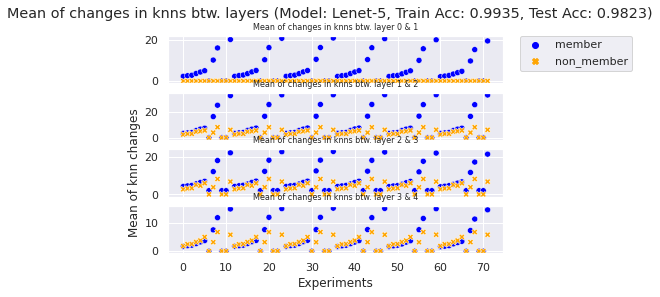

In [49]:
print("Same as above (mean of knns changes between two layers), only in one plot to have a better overview")

plot_mean_layer_experiments_all(mean_knns_layers_member_all_experiments, mean_knns_layers_non_member_all_experiments, experiment_setups, 0, "/home/inafen/jupyter_notebooks/changes_knns_all.png", train_accuracy, test_accuracy)


Plot mean of knns distances for each layer.
In other words: 

1. Get distances to point of all knns for one layer --> --> repeat for all layers, all points

2. Compute mean of knn distances in one layer for all member/ non-member points for one experiment.


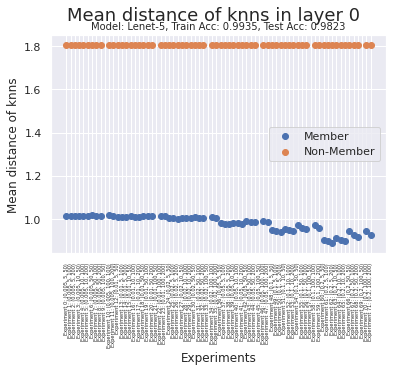

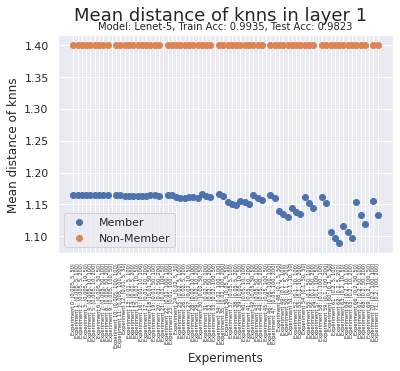

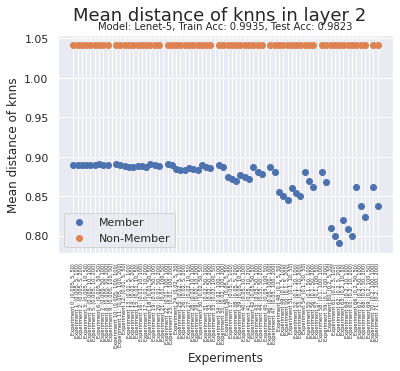

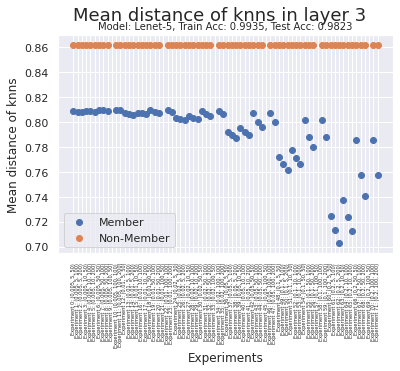

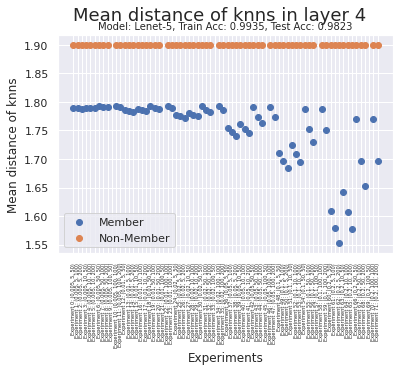

<Figure size 432x288 with 0 Axes>

In [50]:
print("Plot mean of knns distances for each layer.")
print("In other words: \n")
print("1. Get distances to point of all knns for one layer --> --> repeat for all layers, all points\n")
print("2. Compute mean of knn distances in one layer for all member/ non-member points for one experiment.")



plot_member_non_member_layer_experiments_scatter(mean_distances_knns_layers_member_all_experiments, mean_distances_knns_layers_non_member_all_experiments, experiment_setups, 0, "/home/inafen/jupyter_notebooks/distances_knns_0.png", train_accuracy, test_accuracy, ylabel= "Mean distance of knns", suptitle = "Mean distance of knns in layer {}")
plot_member_non_member_layer_experiments_scatter(mean_distances_knns_layers_member_all_experiments, mean_distances_knns_layers_non_member_all_experiments, experiment_setups, 1, "/home/inafen/jupyter_notebooks/distances_knns_1.png", train_accuracy, test_accuracy, ylabel= "Mean distance of knns", suptitle = "Mean distance of knns in layer {}")
plot_member_non_member_layer_experiments_scatter(mean_distances_knns_layers_member_all_experiments, mean_distances_knns_layers_non_member_all_experiments, experiment_setups, 2, "/home/inafen/jupyter_notebooks/distances_knns_2.png", train_accuracy, test_accuracy, ylabel= "Mean distance of knns", suptitle = "Mean distance of knns in layer {}")
plot_member_non_member_layer_experiments_scatter(mean_distances_knns_layers_member_all_experiments, mean_distances_knns_layers_non_member_all_experiments, experiment_setups, 3, "/home/inafen/jupyter_notebooks/distances_knns_3.png", train_accuracy, test_accuracy, ylabel= "Mean distance of knns", suptitle = "Mean distance of knns in layer {}")
plot_member_non_member_layer_experiments_scatter(mean_distances_knns_layers_member_all_experiments, mean_distances_knns_layers_non_member_all_experiments, experiment_setups, 4, "/home/inafen/jupyter_notebooks/distances_knns_4.png", train_accuracy, test_accuracy, ylabel= "Mean distance of knns", suptitle = "Mean distance of knns in layer {}")


Plot sum of consistent knns (= nns, that stay knns) btw. layers in DkNN
In other words: 

1. Compare the knns of the first and another layer --> save consistent knns (e.g. layer 0 [1,2], layer 1 [2,3] --> one consistent) --> repeat for all layers, all points

2. Compute sum of consistent knns throughout the whole DkNN for all member/ non-member points for one experiment.


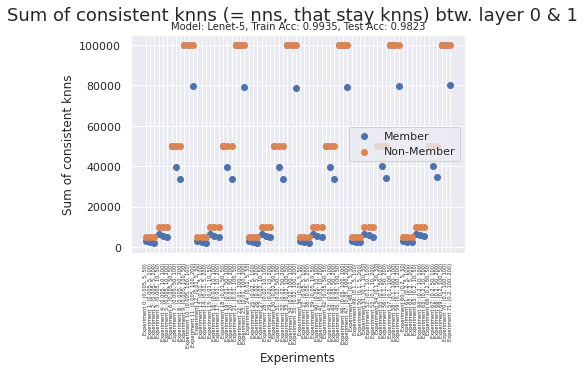

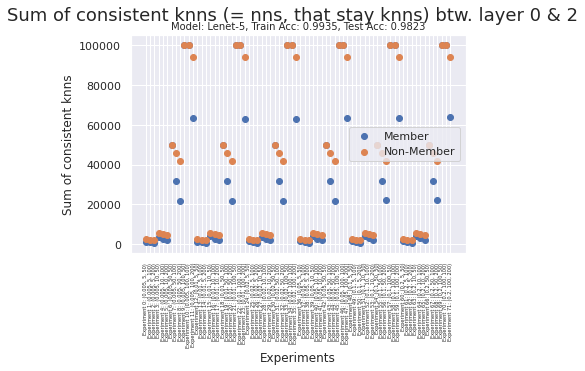

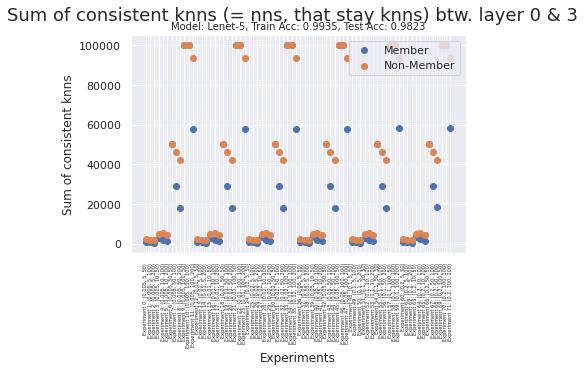

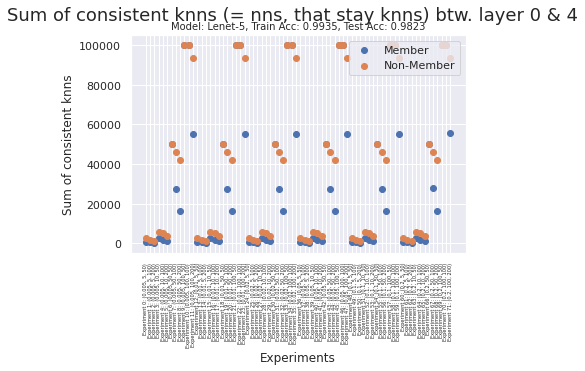

<Figure size 432x288 with 0 Axes>

In [51]:
print("Plot sum of consistent knns (= nns, that stay knns) btw. layers in DkNN")
print("In other words: \n")
print("1. Compare the knns of the first and another layer --> save consistent knns (e.g. layer 0 [1,2], layer 1 [2,3] --> one consistent) --> repeat for all layers, all points\n")
print("2. Compute sum of consistent knns throughout the whole DkNN for all member/ non-member points for one experiment.")


plot_member_non_member_layer_experiments_scatter(sum_similarities_knns_layers_member_all_experiments, sum_similarities_knns_layers_non_member_all_experiments, experiment_setups, 0, "/home/inafen/jupyter_notebooks/similarities_knns_0.png", train_accuracy, test_accuracy, ylabel= "Sum of consistent knns", suptitle = "Sum of consistent knns (= nns, that stay knns) btw. layer 0 & 1")
plot_member_non_member_layer_experiments_scatter(sum_similarities_knns_layers_member_all_experiments, sum_similarities_knns_layers_non_member_all_experiments, experiment_setups, 1, "/home/inafen/jupyter_notebooks/similarities_knns_1.png", train_accuracy, test_accuracy, ylabel= "Sum of consistent knns", suptitle = "Sum of consistent knns (= nns, that stay knns) btw. layer 0 & 2")
plot_member_non_member_layer_experiments_scatter(sum_similarities_knns_layers_member_all_experiments, sum_similarities_knns_layers_non_member_all_experiments, experiment_setups, 2, "/home/inafen/jupyter_notebooks/similarities_knns_2.png", train_accuracy, test_accuracy, ylabel= "Sum of consistent knns", suptitle = "Sum of consistent knns (= nns, that stay knns) btw. layer 0 & 3")
plot_member_non_member_layer_experiments_scatter(sum_similarities_knns_layers_member_all_experiments, sum_similarities_knns_layers_non_member_all_experiments, experiment_setups, 3, "/home/inafen/jupyter_notebooks/similarities_knns_3.png", train_accuracy, test_accuracy, ylabel= "Sum of consistent knns", suptitle = "Sum of consistent knns (= nns, that stay knns) btw. layer 0 & 4")


Plot sum of consistent knns (= nns, that stay knns) in whole DkNN
Almost same as above, but with one difference: 

As a last step, the sum of all consistent knns for all layers for all members/non-members is calculated, for each experiment.


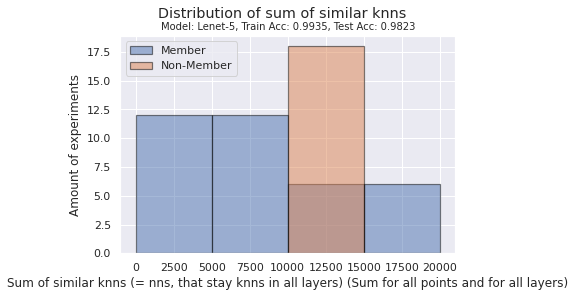

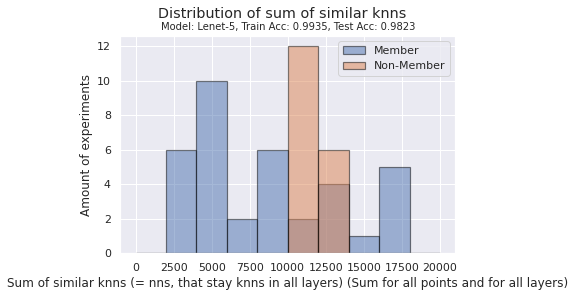

<Figure size 432x288 with 0 Axes>

In [53]:
print("Plot sum of consistent knns (= nns, that stay knns) in whole DkNN")
print("Almost same as above, but with one difference: \n")
print("As a last step, the sum of all consistent knns for all layers for all members/non-members is calculated, for each experiment.")

plot_member_non_member_experiments_histogram(sum_similarities_knns_member_all_experiment, sum_similarities_knns_non_member_all_experiment, train_accuracy, test_accuracy, [0,5000,10000,15000,20000], "/home/inafen/jupyter_notebooks/similarities_knns_big.png")
plot_member_non_member_experiments_histogram(sum_similarities_knns_member_all_experiment, sum_similarities_knns_non_member_all_experiment, train_accuracy, test_accuracy, [0,2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000], "/home/inafen/jupyter_notebooks/similarities_knns_small.png")